# OP_Map

A python library with functions and methods for reading .op2 files and element-mapping plotting. It is extensively based on the capabilities of the library **[pyNastran](https://pynastran-git.readthedocs.io/en/latest/#)**.

**Input files:**
+ .op2 file
+ mapping file (in .json format)
+ .bdf file associated to the .op2 file; only if 2D element results need to be transformed to material coordinates

**Capabilities of OP-Map:**
+ read .op2 files created with solver NASTRAN, Altair OPTISTRUCT
+ transform .op2 2D-element results from element coordiante (native format in .op2) to material coordinates for 2D elements
+ plot element mappings of specific structural components as defined in the mapping file.
+ plot mappings of element forces for a specific components and a single load case
+ plot mappings of maximum, minimum or maximum absolute elemment forces for a specific component for all load cases included in the .op2 file
+ change the mapping file initially loaded for a new one
+ list all load cases in the loaded .op2 file
+ save all results in a dedicated Excel workbook


version beta 0.6 by Félix Ramón López Martínez (frlopezm@gmail.com) 2021

In [1]:
# Import Model class from OP-Map library
from OP_Map_dev import Model

------------------
## Plotting M100 HTP torsion box element forces

In [12]:
# Initialize a variable with the Model class, passing in the .op2 file and element-mapping .json file
M100_model = Model('data/MECEA-OPTISTRUCT/OPTISTRUCT/M100-HTP-LL1.1_Issue2.0.op2', 'data/MECEA-HTP-mapping.json')

Created excel workbook: data/MECEA-OPTISTRUCT/OPTISTRUCT/M100-HTP-LL1.1_Issue2.0.xlsx


In [13]:
# Read into the initialized variable the values of the element forces for cquad4 and tria3 elements
# IMPORTANT: values are passed in as they are in the .op2 file, that is in element coordinates
# For passing in values in material coordinates, use method .r_op2_eforces_matcoord('path_to_bdf_file') instead.
M100_model.r_op2_eforces()

Load cases in the op2 file: 36
Loaded ctria3 and cquad4 element forces in element coordinates from op2 file: data/MECEA-OPTISTRUCT/OPTISTRUCT/M100-HTP-LL1.1_Issue2.0.op2


In [14]:
# List the load cases contained in the .op2 file
M100_model.list_lc(excel = True)

[10004, 10021, 10022, 10023, 10025, 10026, 10027, 10028, 10029, 10030, 10031, 10032, 15004, 15021, 15022, 15023, 15025, 15026, 15027, 15028, 15029, 15030, 15031, 15032, 17004, 17021, 17022, 17023, 17025, 17026, 17027, 17028, 17029, 17030, 17031, 17032]
Results saved in excel workbook: data/MECEA-OPTISTRUCT/OPTISTRUCT/M100-HTP-LL1.1_Issue2.0.xlsx


Results saved in excel workbook: data/MECEA-OPTISTRUCT/OPTISTRUCT/M100-HTP-LL1.1_Issue2.0.xlsx


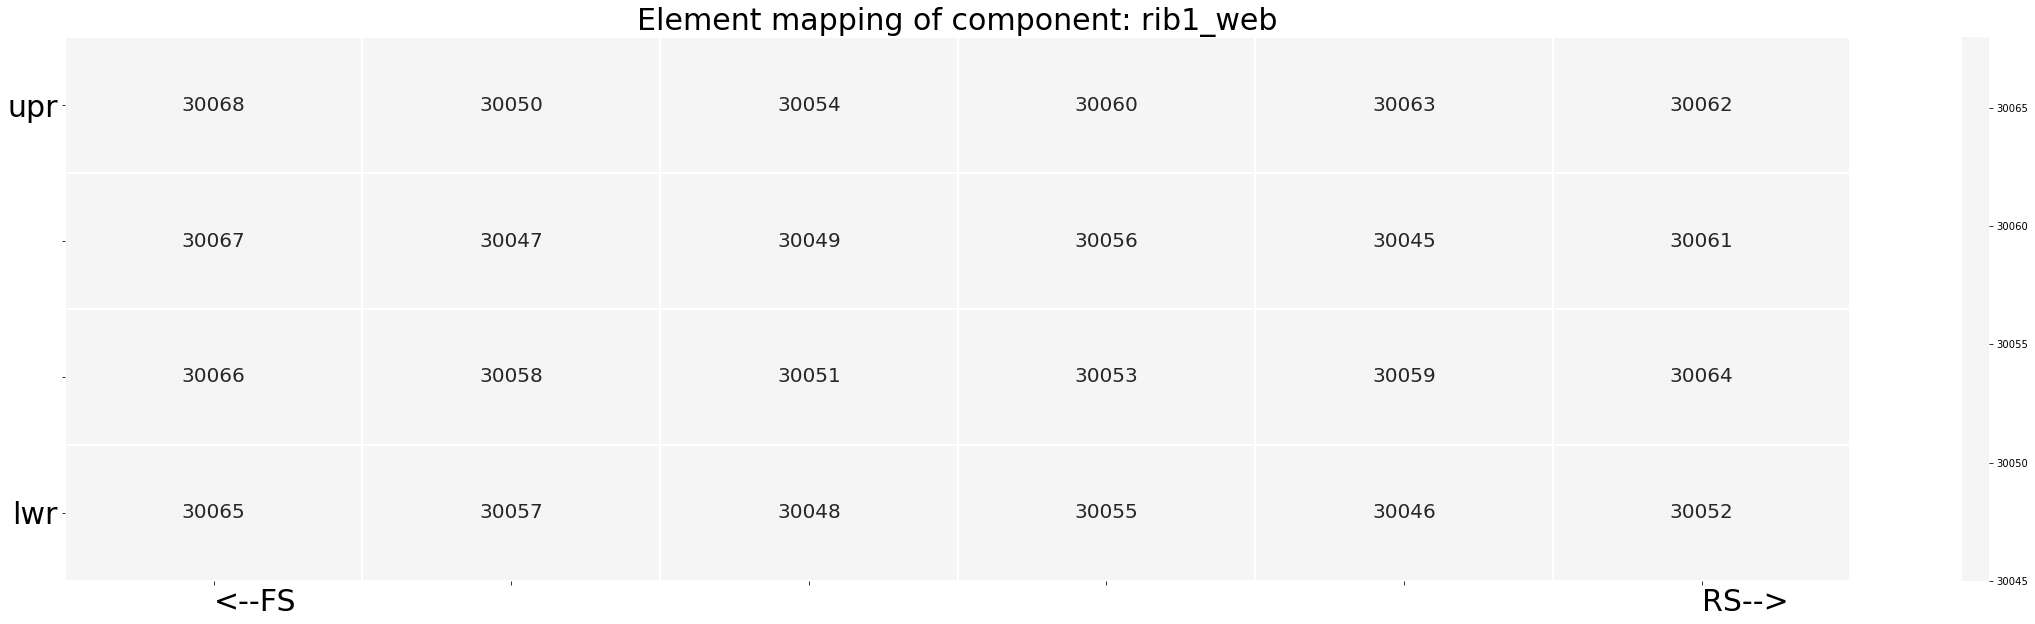

In [15]:
# Plot the element-mapping of a specific componente (as defined in the .json file)
M100_model.plot_component_mapping('rib1_web', excel = True)

Results saved in excel workbook: data/MECEA-OPTISTRUCT/OPTISTRUCT/M100-HTP-LL1.1_Issue2.0.xlsx


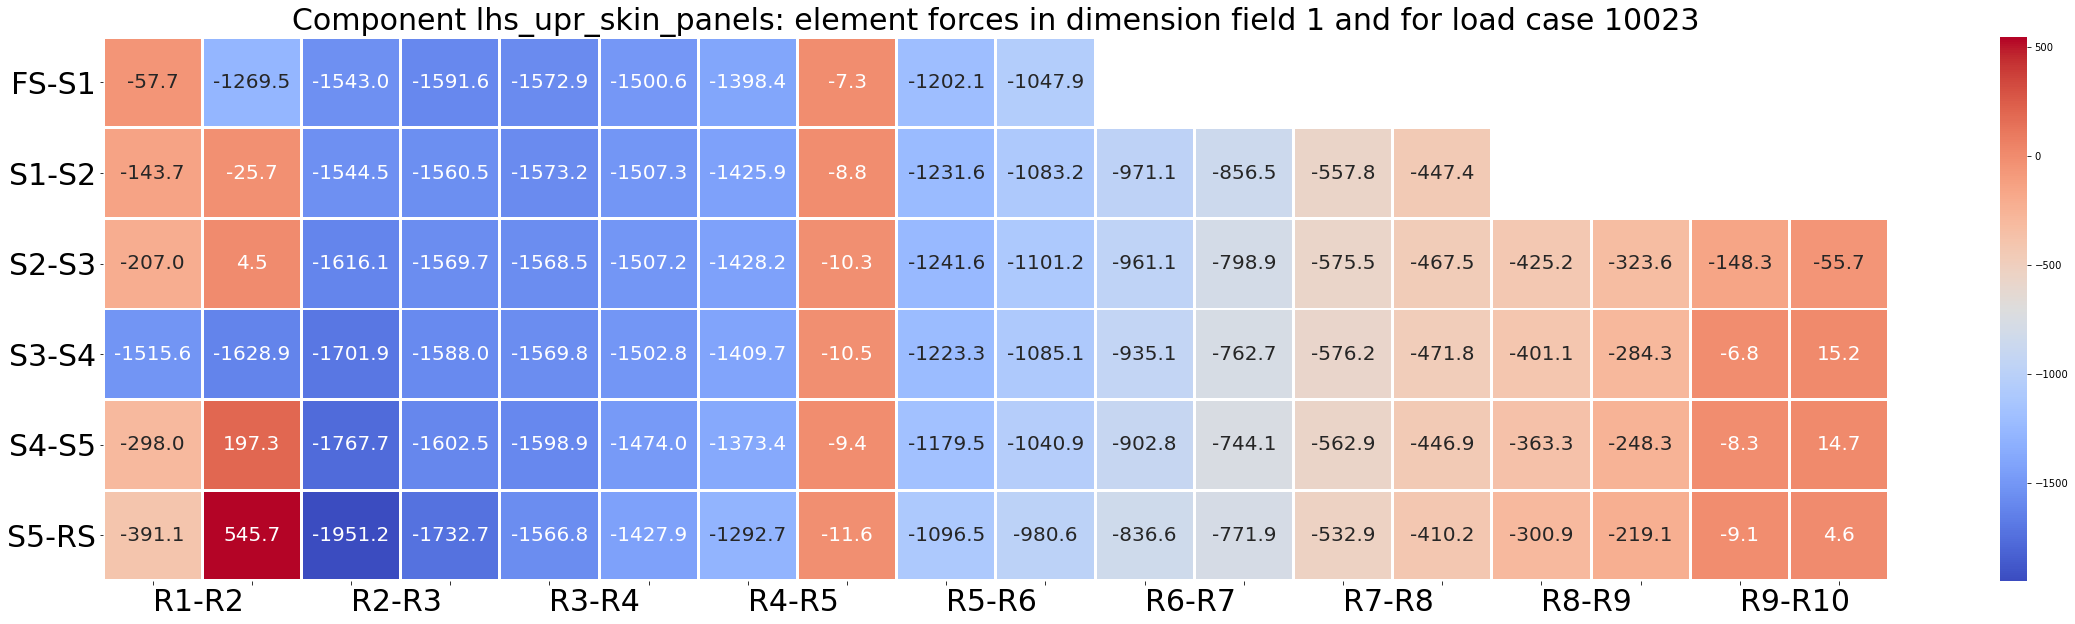

In [16]:
# Plotting mappings of element forces for a component, load case and field value
# Field value components acc. to order in .op2/.f06 file
M100_model.plot_eforces(10023, 'lhs_upr_skin_panels', 1, excel=True)

----------------
### Plotting in material coordinates

In [17]:
# Initialize a new variable with the Model class, passing in the .op2 file and element-mapping .json file
M100_model_mc = Model('data/MECEA-OPTISTRUCT/OPTISTRUCT/M100-HTP-LL1.1_Issue2.0.op2', 'data/MECEA-HTP-mapping.json')

Created excel workbook: data/MECEA-OPTISTRUCT/OPTISTRUCT/M100-HTP-LL1.1_Issue2.0.xlsx


In [18]:
# Read into the initialized variable the values of the element forces for cquad4 and tria3 elements
# in material coordinates
M100_model_mc.r_op2_eforces_matcoord('data/MECEA-OPTISTRUCT/M100-HTP-LL1.1_Issue2.0.bdf')

Load cases in the op2 file: 36
Loaded ctria3 and cquad4 element forces in material coordinates from op2 file: data/MECEA-OPTISTRUCT/OPTISTRUCT/M100-HTP-LL1.1_Issue2.0.op2


Results saved in excel workbook: data/MECEA-OPTISTRUCT/OPTISTRUCT/M100-HTP-LL1.1_Issue2.0.xlsx


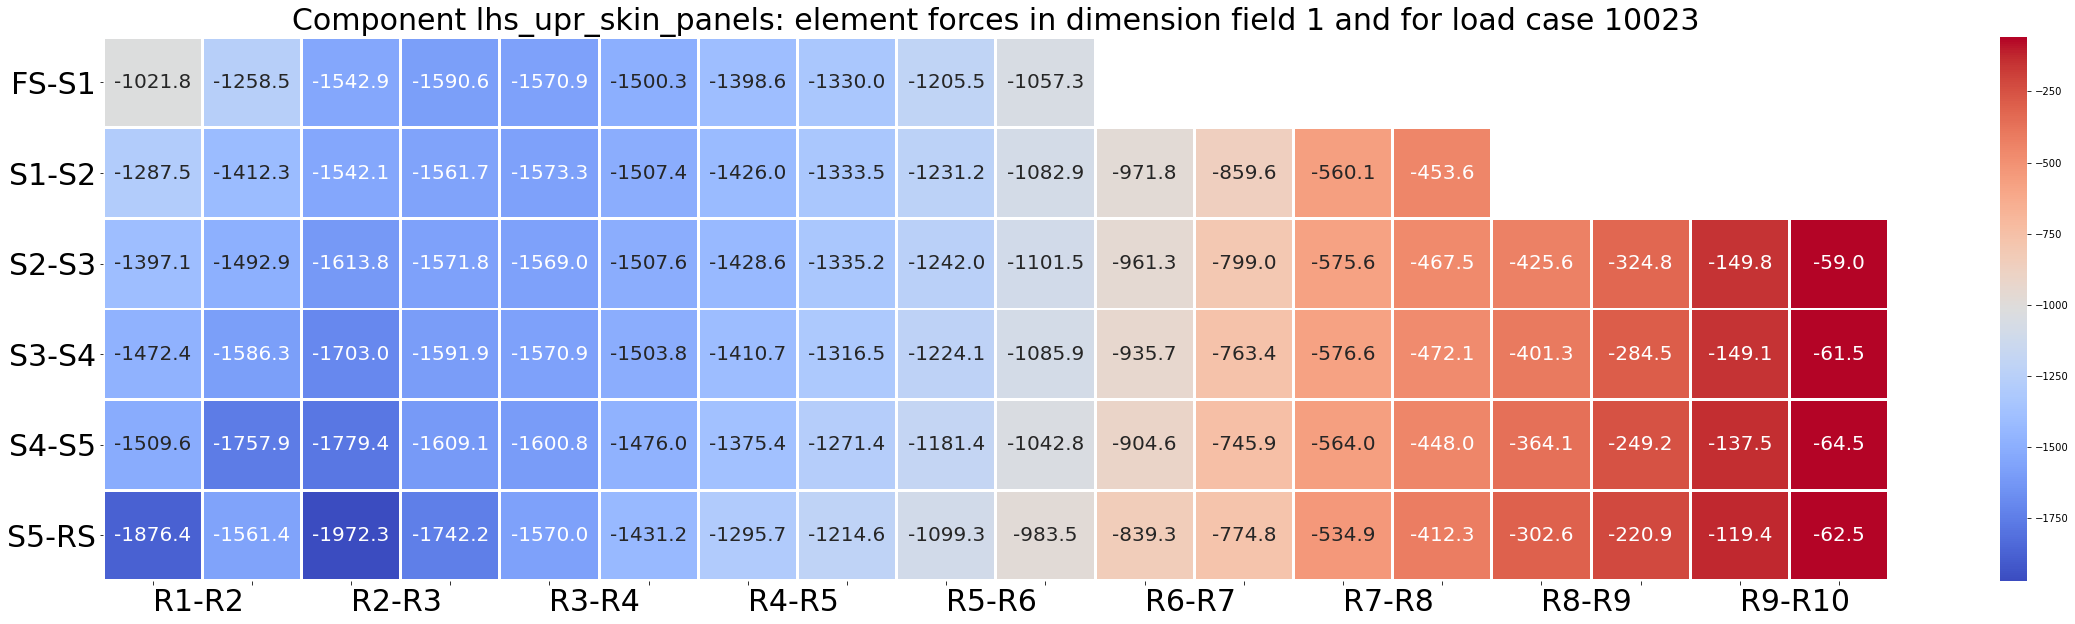

In [19]:
# Plotting mappings of element forces for a component, load case and field value (acc. to order in .op2/.f06 file)
M100_model_mc.plot_eforces(10023, 'lhs_upr_skin_panels', 1, excel=True)

Results saved in excel workbook: data/MECEA-OPTISTRUCT/OPTISTRUCT/M100-HTP-LL1.1_Issue2.0.xlsx


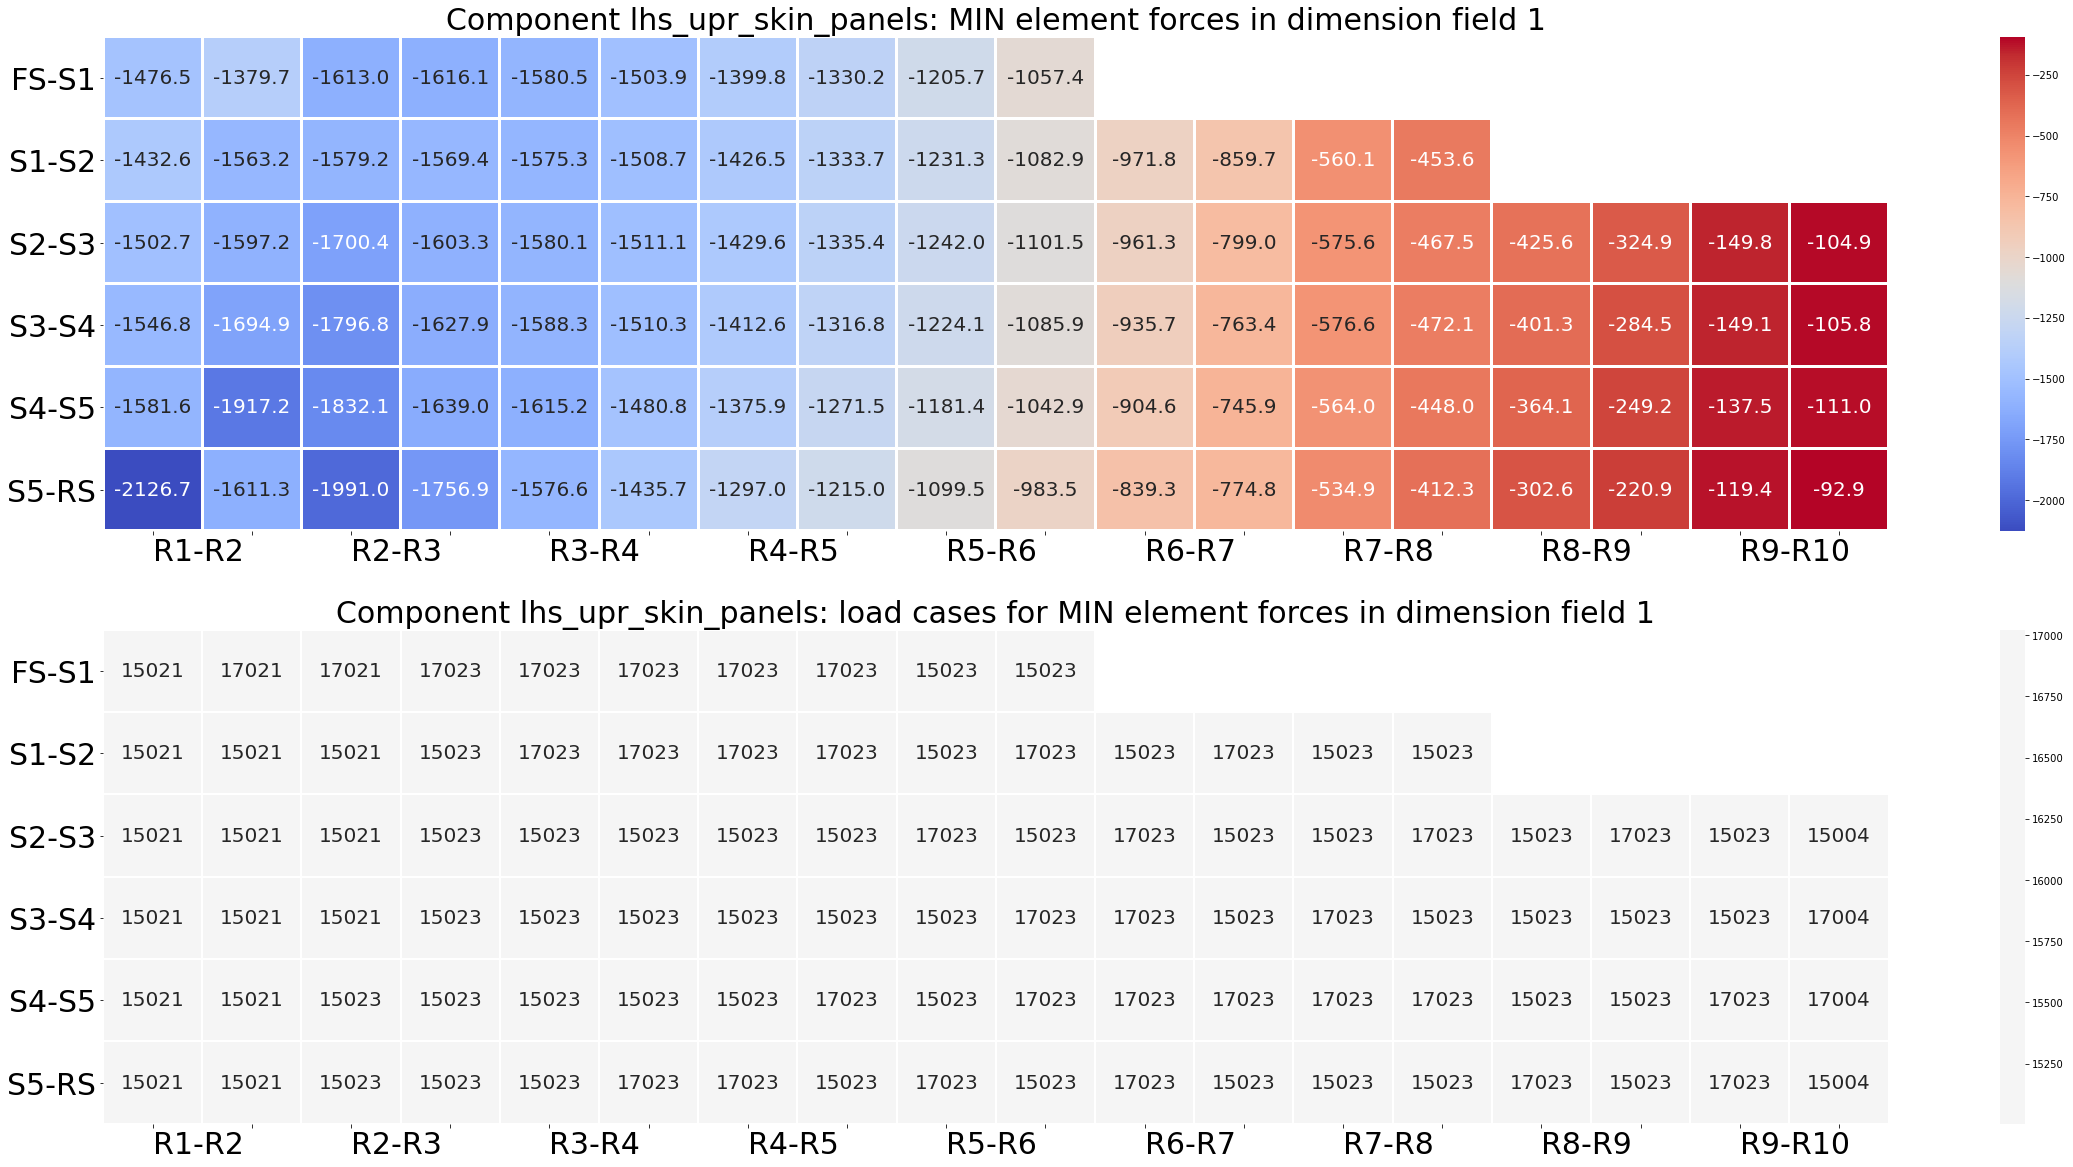

In [20]:
# Plotting mappings of maximum elemment forces and CLC for a specific component for all load cases in the .op2 file
# Field value components acc. to order in .op2/.f06 file
M100_model_mc.plot_env_eforces('lhs_upr_skin_panels', 'MIN', 1, excel=True)